In [ ]:
using MacroEcology
using JLD
mam = load("/Users/michael/.julia/v0.5/MacroEcology.jl/mamobj.jld", "mam")

In [2]:
using Plots; plotlyjs()

In [30]:
# Make this a type recipe

convert_to_image{G <: Any, T <: Any}(var::AbstractVector, asm::Assemblage{G, T}) = convert_to_image(var, asm.site)

function convert_to_image(var::AbstractVector, grd)
    x = Matrix{Float64}(reverse(cells(grd))...)
    fill!(x, NaN)
    xind, yind =  grd.indices[:,1], grd.indices[:,2] #since matrices are probably drawn from upper left corner
    [x[yind[i], xind[i]] = val for (i, val) in enumerate(var)]
    x
end    


convert_to_image (generic function with 5 methods)

In [31]:
x = convert_to_image(richness(mam), mam.site)
heatmap(x, aspect_ratio = :equal, grid = false) #so far only works in plotlyjs()

In [13]:
using Grid

INFO: Precompiling module Grid.


In [18]:
cd = MacroEcology.coords(mam)

17535×2 Named Array{Float64,2}
A ╲ B │  Long    Lat
──────┼─────────────
52310 │ -70.5  -55.5
52311 │ -69.5  -55.5
52312 │ -68.5  -55.5
52313 │ -67.5  -55.5
51948 │ -72.5  -54.5
51949 │ -71.5  -54.5
51950 │ -70.5  -54.5
51951 │ -69.5  -54.5
51952 │ -68.5  -54.5
51953 │ -67.5  -54.5
51954 │ -66.5  -54.5
51955 │ -65.5  -54.5
⋮           ⋮      ⋮
2304  │ -36.5   83.5
2305  │ -35.5   83.5
2306  │ -34.5   83.5
2307  │ -33.5   83.5
2308  │ -32.5   83.5
2309  │ -31.5   83.5
2310  │ -30.5   83.5
2311  │ -29.5   83.5
2312  │ -28.5   83.5
2313  │ -27.5   83.5
2314  │ -26.5   83.5
2315  │ -25.5   83.5

In [24]:
testlong = InterpGrid(Vector(cd[:,"Long"]),BCnil, InterpLinear)
testlat = InterpGrid(Vector(cd[:,"Lat"]),BCnil, InterpLinear)

17535-element Grid.InterpGrid{Float64,1,Grid.BCnil,Grid.InterpLinear}:
 -55.5
 -55.5
 -55.5
 -55.5
 -54.5
 -54.5
 -54.5
 -54.5
 -54.5
 -54.5
 -54.5
 -54.5
 -54.5
   ⋮  
  83.5
  83.5
  83.5
  83.5
  83.5
  83.5
  83.5
  83.5
  83.5
  83.5
  83.5
  83.5


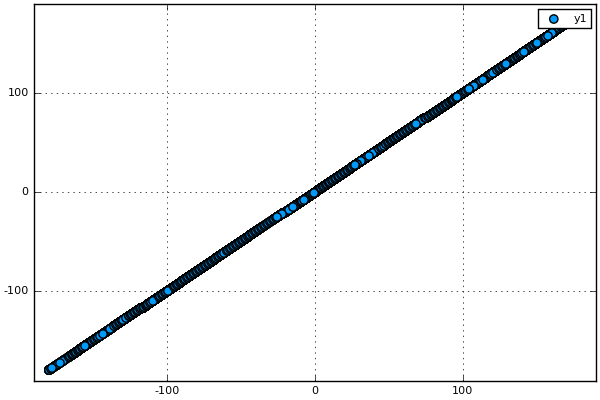

In [25]:
scatter(cd[:,"Long"], testlong)

In [41]:
a = sample(Vector(cd[:,"Long"]), 100)
testlong = CoordInterpGrid(minimum(a):1:maximum(a),a,BCnil, InterpLinear)

LoadError: LoadError: DimensionMismatch("Coordinate lengths do not match grid size.")
while loading In[41], in expression starting on line 2

In [46]:
a = sort(unique(cd[:,"Long"]))
b = sort(sample(a, 100))

testa = InterpGrid(a, BCnil, InterpLinear)
testb = InterpGrid(b, BCnil, InterpLinear)

100-element Grid.InterpGrid{Float64,1,Grid.BCnil,Grid.InterpLinear}:
 -176.5
 -174.5
 -168.5
 -166.5
 -163.5
 -163.5
 -161.5
 -159.5
 -154.5
 -143.5
 -140.5
 -140.5
 -137.5
    ⋮  
  133.5
  138.5
  143.5
  155.5
  156.5
  159.5
  163.5
  164.5
  170.5
  171.5
  172.5
  173.5

In [33]:
testlong[20]

LoadError: LoadError: Invalid location
while loading In[33], in expression starting on line 1

In [34]:
x = -1.0:0.1:1.0
y = 2.0:0.5:10.0
z_2d = Float64[sin(i+j) for i in x, j in y]


21×17 Array{Float64,2}:
 0.841471   0.997495    0.909297   …   0.989358    0.798487    0.412118 
 0.891207   0.999574    0.863209       0.96989     0.734397    0.319098 
 0.932039   0.991665    0.808496       0.940731    0.662969    0.22289  
 0.963558   0.973848    0.745705       0.902172    0.584917    0.124454 
 0.98545    0.9463      0.675463       0.854599    0.501021    0.0247754
 0.997495   0.909297    0.598472   …   0.798487    0.412118   -0.0751511
 0.999574   0.863209    0.515501       0.734397    0.319098   -0.174327 
 0.991665   0.808496    0.42738        0.662969    0.22289    -0.271761 
 0.973848   0.745705    0.334988       0.584917    0.124454   -0.366479 
 0.9463     0.675463    0.239249       0.501021    0.0247754  -0.457536 
 0.909297   0.598472    0.14112    …   0.412118   -0.0751511  -0.544021 
 0.863209   0.515501    0.0415807      0.319098   -0.174327   -0.625071 
 0.808496   0.42738    -0.0583741      0.22289    -0.271761   -0.699875 
 0.745705   0.334988   -0.1

In [77]:
z = rand(10,10)
data(z)

10×10 DataArrays.DataArray{Float64,2}:
 0.139577   0.202049  0.30136    …  0.027901   0.658254   0.0338257
 0.226843   0.035261  0.42243       0.575682   0.451655   0.4322   
 0.280519   0.607437  0.494239      0.138621   0.142638   0.225242 
 0.0573405  0.50035   0.0212006     0.947107   0.0873271  0.636359 
 0.172637   0.935429  0.39757       0.0519984  0.137552   0.0157806
 0.279653   0.295228  0.616726   …  0.84535    0.294659   0.0736814
 0.359487   0.024395  0.791468      0.159427   0.932021   0.647971 
 0.29889    0.426172  0.569196      0.674834   0.473036   0.865966 
 0.835205   0.262597  0.781618      0.543226   0.186344   0.638209 
 0.61118    0.191013  0.456609      0.769856   0.675425   0.110935 

In [78]:
heatmap(data(z))

PyCall.PyError: PyError (:PyObject_Call) <type 'exceptions.AttributeError'>
AttributeError("'list' object has no attribute 'shape'",)
  File "/Users/michael/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 5089, in pcolormesh
    X, Y, C = self._pcolorargs('pcolormesh', *args, allmatch=allmatch)
  File "/Users/michael/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 4692, in _pcolorargs
    numRows, numCols = C.shape


In [36]:
z_2di = CoordInterpGrid((x,y), z_2d, BCnil, InterpQuadratic)

ErrorException: Invalid location

In [37]:
z_2di = InterpGrid(z_2d, BCnil, InterpQuadratic)

21×17 Grid.InterpGrid{Float64,2,Grid.BCnil,Grid.InterpQuadratic}:
 0.841471   0.997495    0.909297   …   0.989358    0.798487    0.412118 
 0.891207   0.999574    0.863209       0.96989     0.734397    0.319098 
 0.932039   0.991665    0.808496       0.940731    0.662969    0.22289  
 0.963558   0.973848    0.745705       0.902172    0.584917    0.124454 
 0.98545    0.9463      0.675463       0.854599    0.501021    0.0247754
 0.997495   0.909297    0.598472   …   0.798487    0.412118   -0.0751511
 0.999574   0.863209    0.515501       0.734397    0.319098   -0.174327 
 0.991665   0.808496    0.42738        0.662969    0.22289    -0.271761 
 0.973848   0.745705    0.334988       0.584917    0.124454   -0.366479 
 0.9463     0.675463    0.239249       0.501021    0.0247754  -0.457536 
 0.909297   0.598472    0.14112    …   0.412118   -0.0751511  -0.544021 
 0.863209   0.515501    0.0415807      0.319098   -0.174327   -0.625071 
 0.808496   0.42738    -0.0583741      0.22289    -0.27176

In [47]:
?Matrix

search: Matrix BitMatrix ComMatrix DenseMatrix SharedMatrix SparseMatrixCSC



No documentation found.

`Base.Matrix` is of type `TypeConstructor`.

**Summary:**

```
immutable TypeConstructor <: Type{T}
```

**Fields:**

```
parameters :: SimpleVector
body       :: Any
```


In [48]:
?Array

search: Array SubArray BitArray DenseArray StridedArray pointer_to_array



```
Array(dims)
```

`Array{T}(dims)` constructs an uninitialized dense array with element type `T`. `dims` may be a tuple or a series of integer arguments. The syntax `Array(T, dims)` is also available, but deprecated.


In [49]:
?StridedArray

search: StridedArray StridedMatrix



No documentation found.

`Base.StridedArray` is of type `TypeConstructor`.

**Summary:**

```
immutable TypeConstructor <: Type{T}
```

**Fields:**

```
parameters :: SimpleVector
body       :: Any
```


In [57]:
x = sample(1:4, 9, replace = true)
y = sample(1:4, 9, replace = true)
z = rand(9)
using DataArrays
Matrix(sparse(x,y,z, 9))

LoadError: LoadError: MethodError: no method matching sparse(::Array{Int64,1}, ::Array{Int64,1}, ::Array{Float64,1}, ::Int64)
Closest candidates are:
  sparse{Tv,Ti<:Integer}(::AbstractArray{Ti<:Integer,1}, ::AbstractArray{Ti<:Integer,1}, ::AbstractArray{Tv,1}, ::Integer, !Matched::Integer, !Matched::Any) at sparse/sparsematrix.jl:382
  sparse(::Any, ::Any, ::AbstractArray{T,1}, ::Any, !Matched::Any) at sparse/sparsematrix.jl:593
  sparse(::Any, ::Any, !Matched::AbstractArray{Bool,1}, ::Any, !Matched::Any) at sparse/sparsematrix.jl:595
  ...
while loading In[57], in expression starting on line 5

In [58]:
?sparse

search: sparse sparsevec SparseVector SparseArrays SparseMatrixCSC issparse



```
sparse(A)
```

Convert an AbstractMatrix `A` into a sparse matrix.

```
sparse(I, J, V,[ m, n, combine])
```

Create a sparse matrix `S` of dimensions `m x n` such that `S[I[k], J[k]] = V[k]`. The `combine` function is used to combine duplicates. If `m` and `n` are not specified, they are set to `maximum(I)` and `maximum(J)` respectively. If the `combine` function is not supplied, `combine` defaults to `+` unless the elements of `V` are Booleans in which case `combine` defaults to `|`. All elements of `I` must satisfy `1 <= I[k] <= m`, and all elements of `J` must satisfy `1 <= J[k] <= n`. Numerical zeros in (`I`, `J`, `V`) are retained as structural nonzeros; to drop numerical zeros, use [`dropzeros!`](:func:`dropzeros!`).

For additional documentation and an expert driver, see `Base.SparseArrays.sparse!`.

sparse(g) is the adjacency_matrix of g


In [61]:
?DenseMatrix

search: DenseMatrix DenseVecOrMat



No documentation found.

`Base.DenseMatrix` is of type `TypeConstructor`.

**Summary:**

```
immutable TypeConstructor <: Type{T}
```

**Fields:**

```
parameters :: SimpleVector
body       :: Any
```


In [80]:
a = summarystats(rand(100))

Summary Stats:
Mean:         0.495942
Minimum:      0.013205
1st Quartile: 0.283798
Median:       0.505712
3rd Quartile: 0.758443
Maximum:      0.979823


LoadError: LoadError: MethodError: Cannot `convert` an object of type StatsBase.SummaryStats{Float64} to an object of type DataFrames.DataFrame
This may have arisen from a call to the constructor DataFrames.DataFrame(...),
since type constructors fall back to convert methods.
while loading In[83], in expression starting on line 2

In [84]:
a = @data([NA, 1, 2, 4])

4-element DataArrays.DataArray{Int64,1}:
  NA
 1  
 2  
 4  

In [85]:
a/2

4-element DataArrays.DataArray{Float64,1}:
  NA
 0.5
 1.0
 2.0

In [86]:
2/0


Inf

In [87]:
using StatPlots

INFO: Recompiling stale cache file /Users/michael/.julia/lib/v0.5/StatPlots.ji for module StatPlots.


In [88]:
whos(StatPlots)

                      @animate      0 bytes  Plots.#@animate
                 @colorant_str      0 bytes  Colors.#@colorant_str
                          @gif      0 bytes  Plots.#@gif
                       @layout      0 bytes  Plots.#@layout
                       @recipe      0 bytes  RecipesBase.#@recipe
                       @series      0 bytes  RecipesBase.#@series
                   @shorthands      0 bytes  Plots.#@shorthands
                     @userplot      0 bytes  Plots.#@userplot
                          ABGR    236 bytes  DataType
                        ADIN99    204 bytes  DataType
                       ADIN99d    204 bytes  DataType
                       ADIN99o    204 bytes  DataType
                         AGray    212 bytes  DataType
                       AGray32    112 bytes  DataType
                          AHSI    204 bytes  DataType
                          AHSL    204 bytes  DataType
                          AHSV    204 bytes  DataType
           

In [89]:
fieldnames(StatPlots.GridLayout)

7-element Array{Symbol,1}:
 :parent 
 :minpad 
 :bbox   
 :grid   
 :widths 
 :heights
 :attr   

In [26]:
Pkg.checkout("Plots")
Pkg.build("Plots")

INFO: Checking out Plots master...
INFO: Pulling Plots latest master...
INFO: No packages to install, update or remove
INFO: Building Plots


In [35]:
using StatsBase, Plots
z = Matrix{Float64}(4,5)
fill!(z, NaN)
x = sample(1:4, 9, replace = true)
y = sample(1:4, 9, replace = true)
ll = rand(9)
for i in 1:length(x)
    z[x[i],y[i]] = ll[i]
end

In [40]:
gr()
heatmap(z, grid = false)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 4 
 
 
 5 
 
 
 1.0 
 
 
 1.5 
 
 
 2.0 
 
 
 2.5 
 
 
 3.0 
 
 
 3.5 
 
 
 4.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<image width="18" height="373" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAABIAAAF1CAYAAADlSLoBAAABI0lEQVR4nO3bUU0FQRBFwYWMABwg
Af9qngUcgAU+JifdpFZAJX3u3yT79vn1+nkufO83ENDfvvN83IHmnTYPEjuExA4hsUNI7I2Q1UJI
7BASO4TEDiGxQ0jsjdB5nu8r0LzT5kFih5DYISR2CIm9EbJaCIkdQmKHkNghJHYIib0RsloInUtP
bANPmweJHUJih5DYGyGrhZDYISR2CIkdQmKHkNgbIauFkNghdC69jA08bR4kdgiJvRGyWgiJHUJi
h5DYISR2CIm9EbJaCIkdQmKH0Hku/cA277R5kNgbIauFkNghJHYIiR1CYoeQ2Bshq4WQ2CEkdgiJ
HULn0svYwNP+MWS1EBI7hMQOIbFDSOwQEnsjZLUQEjuExA4hsUNI7BD6BRMeKZQf32oZAAAAAElF
TkSuQmCC
" transform="translate(548, 3)"/>
 
 
 0 
 
 
 0.1 
 
 
 0.2 
 
 
 0.3 
 
 
 0.4 
 
 
 0.5 
 
 
 0.6 
 
 
 0.7 
 
 
 0.8

In [37]:
plotlyjs()
heatmap(z, grid = false)

In [18]:
plotlyjs()


Plots.PlotlyJSBackend()

In [41]:
Pkg.free("GR")

INFO: Freeing GR
INFO: No packages to install, update or remove


In [39]:
Pkg.build("GR")

INFO: Building GR
